### Import modules

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import io
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
import qrcode
import os
import shutil

# Plotting style
plt.style.use('ggplot')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_format='retina'

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma15_b1891_octscan"
SAVE_STUDY_EOS = False

# Function to generate animations
def mpl_fig2array(plt):
    with io.BytesIO() as buffer:  # use buffer memory
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        img = Image.open(buffer)
        return np.asarray(img)

/tmp/ipykernel_782937/1383647671.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


### Save study in an archive on EOS

In [ ]:
if SAVE_STUDY_EOS:
    path_study = "/afs/cern.ch/work/c/cdroin/private/DA_study/master_study/"
    l_path = [
        path_study + "001_make_folders_scanoct.py",
        path_study + "002_chronjob.py",
        path_study + "003_postprocessing.py",
        path_study + "analysis/notebooks/analysis_opt_flathv_75_1500_withBB_chroma15_b1891_octscan.ipynb",
    ]
    # Recursively add to l_path all the files in path_study + "master_jobs" and subfolders
    for path, subdirs, files in os.walk(path_study + "master_jobs"):
        for name in files:
            l_path.append(os.path.join(path, name))

    # Same with path_study + "opt_flathv_75_1500_withBB_chroma15_b1891_octscan"
    for path, subdirs, files in os.walk(path_study + "opt_flathv_75_1500_withBB_chroma15_b1891_octscan"):
        for name in files:
            l_path.append(os.path.join(path, name))

    # Convert to a set of files that must not be ignored
    set_files_to_keep = set([x.split("/")[-1] for x in l_path])

    # defining the function to ignore the files
    # if present in any folder
    def ignore_files(dir, files):
        return [f for f in files if os.path.isfile(os.path.join(dir, f)) and f not in set_files_to_keep]
    
    # # calling the shutil.copytree() method and
    # # passing the src,dst,and ignore parameter
    # ! the file must be outside of path_study, otherwise it will be recursively copied
    # ! Copying from EOS is a very lenghty process
    path_EOS = "/eos/home-c/cdroin/save_simulations/"
    path_archive = path_EOS + STUDY_NAME
    shutil.copytree(path_study,
                    path_archive,
                    ignore=ignore_files)

In [ ]:
if SAVE_STUDY_EOS:
    # Convert the archive to a zip file, and export to EOS
    shutil.make_archive(path_archive,
                        'zip',
                        path_EOS,
                        path_archive.split('/')[-1])

In [ ]:
if SAVE_STUDY_EOS:
    # Delete the archive
    shutil.rmtree(path_archive)

### Load data

In [4]:
# Load dataframe
df = pd.read_parquet(f"../../{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df


,normalized amplitude in xy-plane,q1,q2,nb,on_x1,oct_current,bunch_nb
name 1,,,,,,,
madx_000,2.875,62.305,60.310,1.400000e+11,250.0,-350.0,1891.0
madx_001,3.250,62.305,60.310,1.400000e+11,250.0,-330.0,1891.0
madx_002,3.125,62.305,60.310,1.400000e+11,250.0,-310.0,1891.0
madx_003,2.938,62.305,60.310,1.400000e+11,250.0,-290.0,1891.0
madx_004,3.281,62.305,60.310,1.400000e+11,250.0,-270.0,1891.0
...,...,...,...,...,...,...,...
madx_765,2.000,62.326,60.331,1.400000e+11,250.0,250.0,1891.0
madx_766,2.000,62.326,60.331,1.400000e+11,250.0,270.0,1891.0
madx_767,2.000,62.326,60.331,1.400000e+11,250.0,290.0,1891.0


In [5]:
# Reshape for plotting
df_to_plot = df.pivot(index="q1", columns="oct_current", values="normalized amplitude in xy-plane")
df_to_plot


oct_current,-350.0,-330.0,-310.0,-290.0,-270.0,-250.0,-230.0,-210.0,-190.0,-170.0,...,150.0,170.0,190.0,210.0,230.0,250.0,270.0,290.0,310.0,330.0
q1,,,,,,,,,,,,,,,,,,,,,
62.305,2.875,3.250,3.125,2.938,3.281,3.438,3.406,3.344,3.531,3.688,...,4.031,4.000,3.781,3.719,4.156,3.594,3.750,3.719,3.906,3.750
62.306,3.156,3.625,3.719,3.719,3.531,3.750,3.688,3.500,3.750,3.594,...,3.688,3.844,3.938,4.094,3.531,3.594,3.906,3.656,3.562,3.469
62.307,3.781,3.750,3.656,3.750,3.719,3.781,3.562,3.531,3.656,3.719,...,3.625,3.844,3.844,3.812,3.844,4.000,4.000,4.188,3.906,3.688
62.308,3.469,3.719,3.719,4.062,3.625,3.594,3.531,3.469,3.781,3.750,...,3.969,3.938,4.375,4.781,4.438,3.938,5.125,5.219,4.812,4.688
62.309,3.562,3.406,3.531,3.656,3.375,3.688,3.594,3.531,3.500,3.281,...,5.438,5.406,5.094,5.531,5.344,5.094,5.312,5.031,4.781,5.125
62.310,3.656,3.719,3.500,3.312,3.625,3.531,3.375,3.281,3.562,3.469,...,5.781,5.531,5.406,5.250,5.375,5.094,4.906,5.062,5.062,5.000
62.311,3.500,3.125,3.031,3.281,3.344,3.375,3.281,3.375,3.469,3.094,...,5.344,5.406,5.188,5.281,5.250,5.094,5.125,5.094,5.000,4.812
62.312,3.281,3.156,3.375,3.156,3.375,3.344,3.344,3.094,3.219,3.250,...,5.500,5.312,5.531,5.156,4.906,5.250,4.906,4.938,4.875,4.719
62.313,3.156,3.281,3.031,3.125,3.375,3.531,4.250,4.594,5.062,5.188,...,5.250,5.469,5.219,5.000,5.125,4.906,4.656,4.719,4.844,4.719


In [6]:
# Replace nan with average of neighbors
df_to_plot.iloc[-3, -3 ] = np.nan

df_to_plot = df_to_plot.interpolate(method='linear', axis=0, limit_direction='both')

In [7]:
# Eliminate the columns -350
df_to_plot = df_to_plot.drop(columns=[-350])

### Set up QR code

In [8]:
# To add QR codes to plot
def add_QR_code(fig, link):
# Add QR code pointing to the github repository
    qr = qrcode.QRCode(
        #version=None,
        box_size=10,
        border=1,
    )
    qr.add_data(link)
    qr.make(fit=False)
    im = qr.make_image(fill_color="black", back_color="transparent")
    newax = fig.add_axes([0.9,0.9,0.05,0.05], anchor='NE', zorder=1)
    newax.imshow(im, resample = False, interpolation = 'none', filternorm = False)
    # Add link below qrcode
    newax.plot([0, 0], [0, 0], color='white', label='link')
    text = newax.annotate("lin", xy=(0,300), xytext=(0, 300), fontsize = 30,
                        url=link, 
                        bbox=dict(color='white', alpha=1e-6, url=link), 
                        alpha=0)
    # Hide X and Y axes label marks
    newax.xaxis.set_tick_params(labelbottom=False)
    newax.yaxis.set_tick_params(labelleft=False)
    # Hide X and Y axes tick marks
    newax.set_xticks([])
    newax.set_yticks([])
    newax.set_axis_off()

    return fig

### Plot heatmap for tune-tune scan

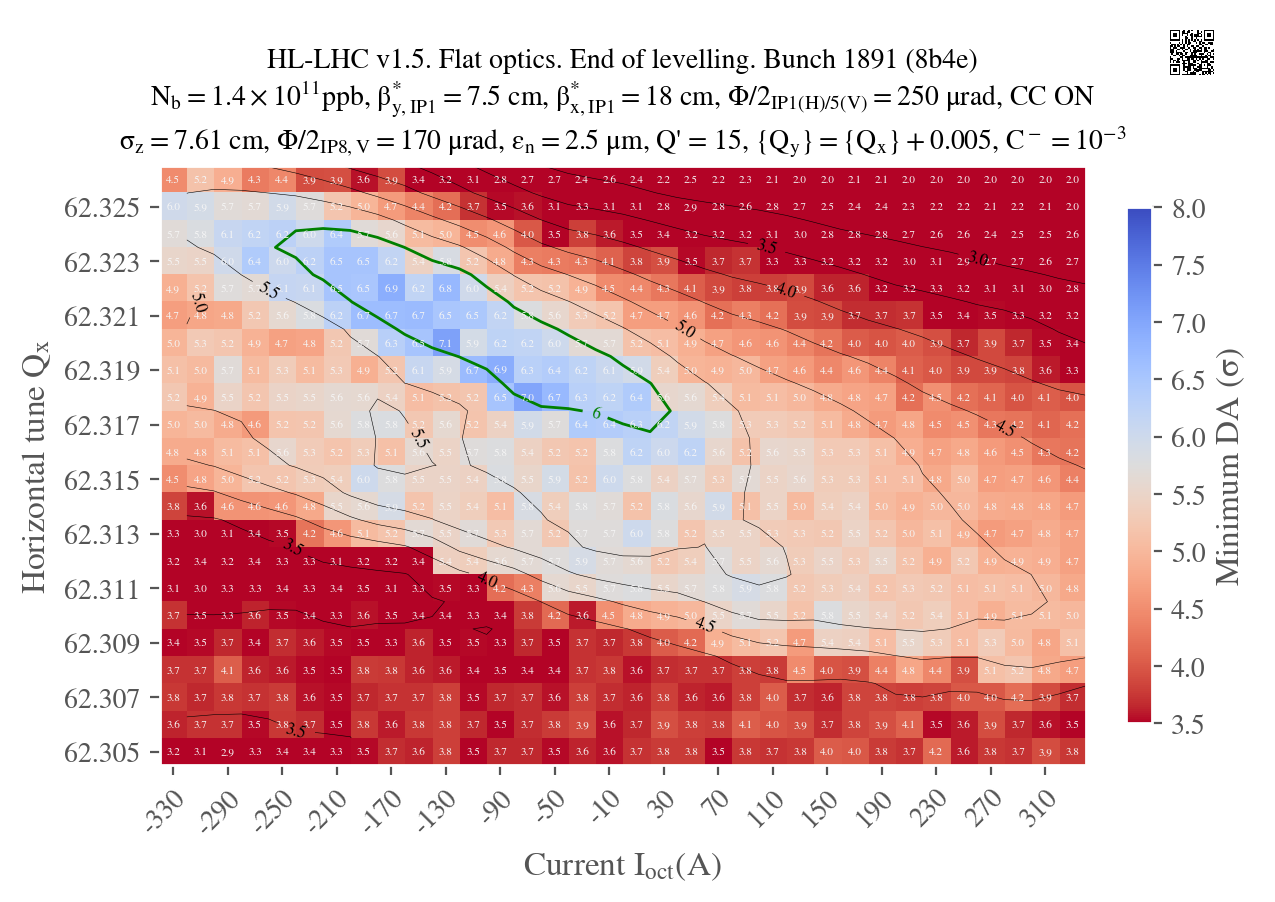

In [18]:
# Function to convert floats to scientific latex format
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str


def plot_heatmap(df_to_plot):
    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(data_array, cmap="coolwarm_r", vmin=3.5, vmax=8)
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=[int(x) for x in df_to_plot.columns[::2]])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(df_to_plot.index)):
        for j in range(len(df_to_plot.columns)):
            text = ax.text(
                j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="whitesmoke", fontsize=4
            )
            
    # Smooth data for contours
    data_smoothed = gaussian_filter(data_array, 1.0)

    # Plot contours
    CSS = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        data_smoothed,
        colors="black",
        levels=list(np.arange(3, 6, 0.5)) + list(np.arange(6.5, 10, 0.5)),
        linewidths=0.2,
    )
    ax.clabel(CSS, inline=True, fontsize=6)
    CS2 = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        data_smoothed,
        colors="green",
        levels=[6],
        linewidths=1,
    )
    ax.clabel(CS2, inline=1, fontsize=6)

    # ! Diagonal lines must be plotted after the contour lines, because of bug in matplotlib
    # # Identity line
    # ax.plot([0, 1000], [0, 1000], color="black", linestyle="--", linewidth=1)
    # # plus minus 0.05 line (Q increment is 10**-3)
    # ax.plot([0, 1000], [5, 1005], color="tab:blue", linestyle="--", linewidth=1)
    # ax.plot([0, 1000], [-5, 995], color="tab:blue", linestyle="--", linewidth=1)

    ax.set_title(
        "HL-LHC v1.5. Flat optics. End of levelling. Bunch 1891 (8b4e)"
        + "\n"
        + f"$N_b = $"
        + latex_float(df.nb.min())
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + ", CC ON"
        + "\n"
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 15"
        + ", "
        + r"$\{Q_{y}\} = \{Q_{x}\} + 0.005 $"
        + ", "
        + r"$C^-=10^{-3}$",
        fontsize=10,
    )
    
    ax.set_xlabel("Current " + r"$I_{oct}(A)$")
    ax.set_ylabel("Horizontal tune " + r"$Q_x$")
    ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.026, pad=0.04)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)


    # Add QR code
    link = "https://cernbox.cern.ch/s/lDKRCWqnNbi44Lz"
    fig = add_QR_code(fig, link)

    plt.savefig("../plots/output_" + STUDY_NAME + ".pdf", bbox_inches="tight")
    plt.show()


plot_heatmap(df_to_plot)


### Copy all files used for the study on EOS

In [13]:
path_study = "/afs/cern.ch/work/c/cdroin/private/DA_study/master_study/"
l_path = [
    path_study + "001_make_folders_scanoct.py",
    path_study + "002_chronjob.py",
    path_study + "003_postprocessing.py",
    path_study + "analysis/notebooks/analysis_opt_flathv_75_1500_withBB_chroma15_b1891_octscan.ipynb",
]
# Recursively add to l_path all the files in path_study + "master_jobs" and subfolders
for path, subdirs, files in os.walk(path_study + "master_jobs"):
    for name in files:
        l_path.append(os.path.join(path, name))

# Same with path_study + "opt_flathv_75_1500_withBB_chroma15_b1891_octscan"
for path, subdirs, files in os.walk(path_study + "opt_flathv_75_1500_withBB_chroma15_b1891_octscan"):
    for name in files:
        l_path.append(os.path.join(path, name))

# Convert to a set of files that must not be ignored
set_files_to_keep = set([x.split("/")[-1] for x in l_path])
directory_to_ignore = ["/afs/cern.ch/work/c/cdroin/private/DA_study/master_study/opt_flathv_75_1500_withBB_chroma15_1p4_all_bunches"]

# defining the function to ignore the files
# if present in any folder
def ignore_files(dir, files):
    l_files_to_ignore = []
    for f in files:
        path_file = os.path.join(dir, f)

        # Ignore directories explicitely specified
        if path_file in directory_to_ignore:
            l_files_to_ignore.append(f)

        # Don't ignore files explicitely specified
        if os.path.isfile(os.path.join(dir, f)) and f not in set_files_to_keep:
            l_files_to_ignore.append(f)

    return l_files_to_ignore
 

# # calling the shutil.copytree() method and
# # passing the src,dst,and ignore parameter
# ! the file must be outside of path_study, otherwise it will be recursively copied
# ! Copying from EOS is a very lenghty process
path_EOS = "/eos/home-c/cdroin/save_simulations/"
path_archive = path_EOS + STUDY_NAME
print('Start copying file, this may take a while...')
shutil.copytree(path_study,
                path_archive,
                ignore=ignore_files)

Start copying file, this may take a while...


In [11]:
# Convert the archive to a zip file, and export to EOS
shutil.make_archive(path_archive,
                    'zip',
                    path_EOS,
                    path_archive.split('/')[-1])


'/eos/home-c/cdroin/save_simulations/opt_flathv_75_1500_withBB_chroma15_b1891_octscan.zip'

In [12]:
# Delete the folder archive
shutil.rmtree(path_archive)

OSError: [Errno 39] Directory not empty: 'opt_flathv_75_1500_withBB_chroma15_b1891_octscan'